# Testing the h5 files for training

Looking at the original h5 files used for training

In [9]:
import pandas as pd

# Load each dataset into a DataFrame
train_x_df = pd.read_hdf('/eos/user/k/kstehle/atlas-hlt-datasets/reduced_hlt_train_set_2023_x.h5')
val_x_df = pd.read_hdf('/eos/user/k/kstehle/atlas-hlt-datasets/reduced_hlt_val_set_2023_x.h5')
val_y_df = pd.read_hdf('/eos/user/k/kstehle/atlas-hlt-datasets/reduced_hlt_val_set_2023_y.h5')
test_x_df = pd.read_hdf('/eos/user/k/kstehle/atlas-hlt-datasets/reduced_hlt_test_set_2023_x.h5')
test_y_df = pd.read_hdf('/eos/user/k/kstehle/atlas-hlt-datasets/reduced_hlt_test_set_2023_y.h5')



train_val_test_datasets = {"Train X": train_x_df, 
                           "Val X": val_x_df, 
                           "Val y": val_y_df, 
                           "Test X": test_x_df, 
                           "Test y": test_y_df
                          }


# Display the first few rows of each DataFrame to understand their structure
print("Train X Data:")
print(train_x_df.iloc[400:401])

print("\nValidation X Data:")
print(val_x_df.iloc[400:401])

print("\nValidation Y Data:")
print(val_y_df.iloc[400:401])

print("\nTest X Data:")
print(test_x_df.iloc[400:401])

print("\nTest Y Data:")
print(test_y_df.iloc[400:401])


Train X Data:
                                        m_1        m_2        m_3        m_4  \
2023-06-07 22:55:15.001443+02:00  26.199789  26.200011  26.400043  26.399344   

                                        m_5        m_6        m_7        m_8  \
2023-06-07 22:55:15.001443+02:00  26.399817  26.399545  26.000293  26.199971   

                                        m_9       m_10  ...    std_86  \
2023-06-07 22:55:15.001443+02:00  26.199841  26.199872  ...  0.262973   

                                    std_87    std_88    std_89    std_90  \
2023-06-07 22:55:15.001443+02:00  0.288682  0.350435  0.367073  0.759099   

                                    std_91    std_92    std_93    std_94  \
2023-06-07 22:55:15.001443+02:00  0.555551  0.543743  0.550673  0.717396   

                                    std_95  
2023-06-07 22:55:15.001443+02:00  0.517829  

[1 rows x 146 columns]

Validation X Data:
                                        m_1        m_2        m_3        m_4 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plotting_DL_datasets(dataset_x_df):
    # Ensure the index is a DatetimeIndex
    if not isinstance(dataset_x_df.index, pd.DatetimeIndex):
        dataset_x_df.index = pd.to_datetime(dataset_x_df.index)

    # DatetimeIndex is timezone-naive or timezone-aware?
    if dataset_x_df.index.tz is None:
        dataset_x_df.index = dataset_x_df.index.tz_localize('Europe/Paris')
    else:
        # If timezone-aware, convert to CERN time
        dataset_x_df.index = dataset_x_df.index.tz_convert('Europe/Paris')

    # Index ready for plotting
    timestamp = dataset_x_df.index

    # timestamp is ready to be used, and it will remain the index
    dataset_x_df.index = timestamp  # Assign the localized/converted timestamp back to the index

    # Select only the median and std columns
    median_columns = [col for col in dataset_x_df.columns if col.startswith('m_')]
    std_columns = [col for col in dataset_x_df.columns if col.startswith('std_')]

    # Plot each median and corresponding standard deviation as a function of time
    plt.figure(figsize=(14, 8))

    for median_col, std_col in zip(median_columns, std_columns):
        plt.plot(timestamp, dataset_x_df[median_col], label=f'{median_col}')
        plt.fill_between(timestamp, 
                         dataset_x_df[median_col] - dataset_x_df[std_col], 
                         dataset_x_df[median_col] + dataset_x_df[std_col], 
                         alpha=0.2, label=f'{median_col} ± {std_col}')

    plt.title('Medians and Standard Deviations Over Time')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=2, borderaxespad=0.)

    # Set x-axis major formatter to show year, month, day, hour, minute, and second
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

    # Optionally set major locator to improve readability (e.g., every 10 minutes)
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

    # Rotate and format the x-axis dates for better readability
    plt.gcf().autofmt_xdate()

    plt.show()



Train X


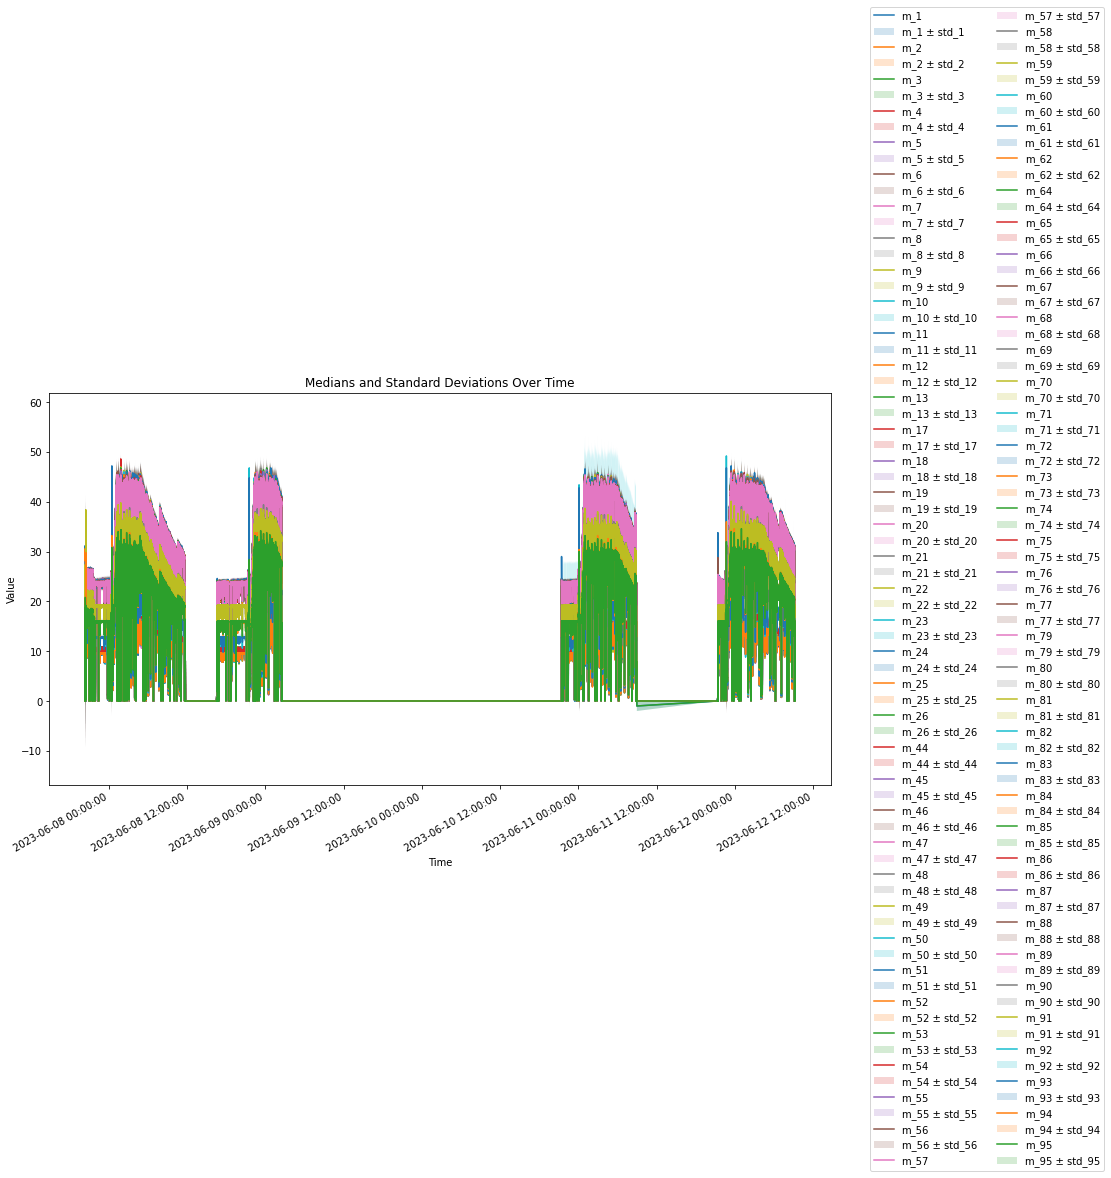

Val X


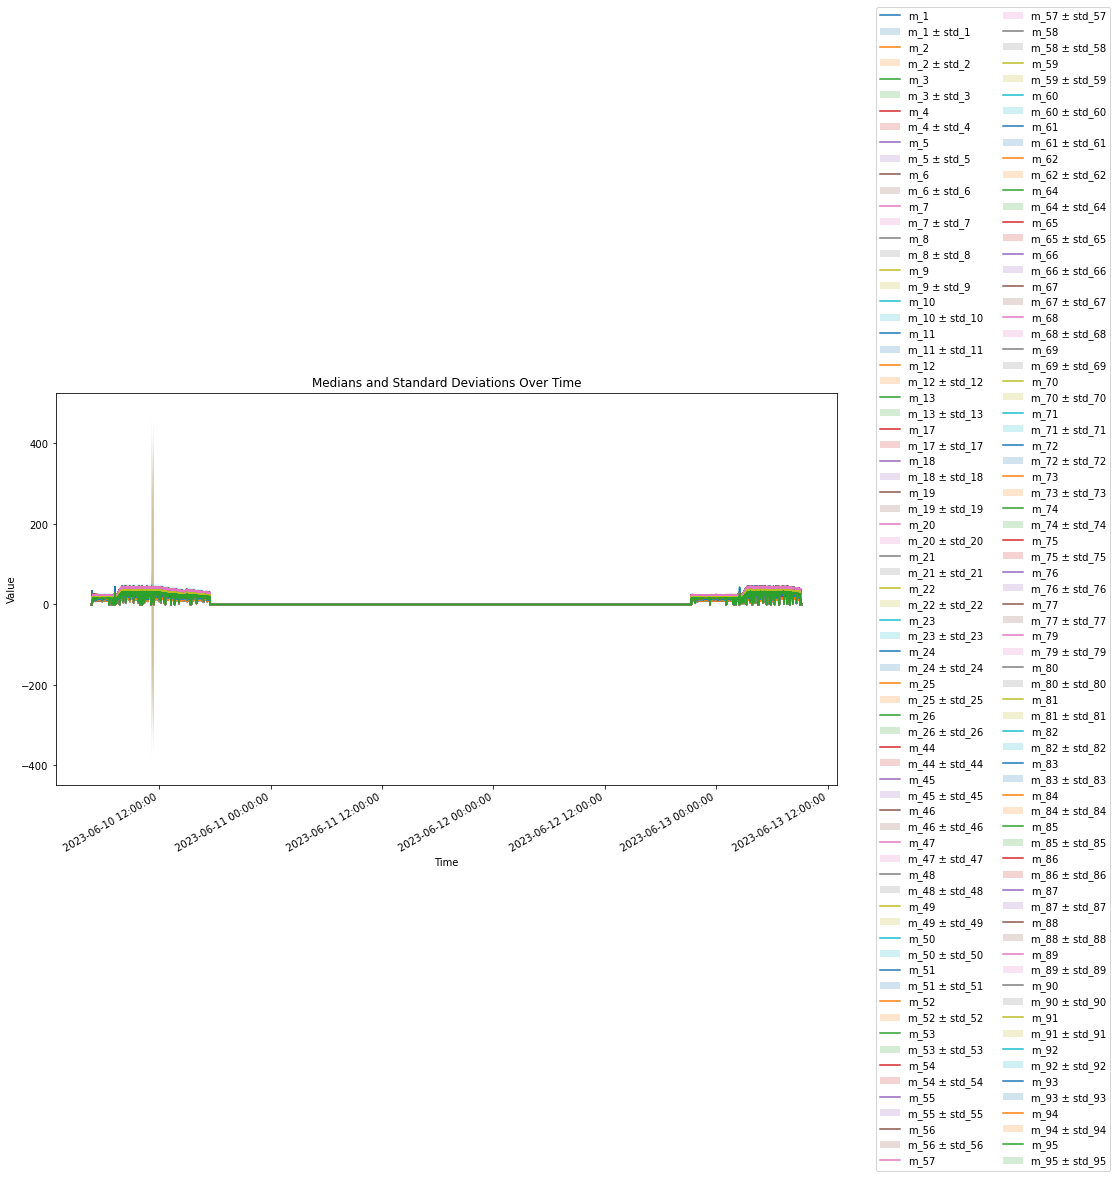

Val y


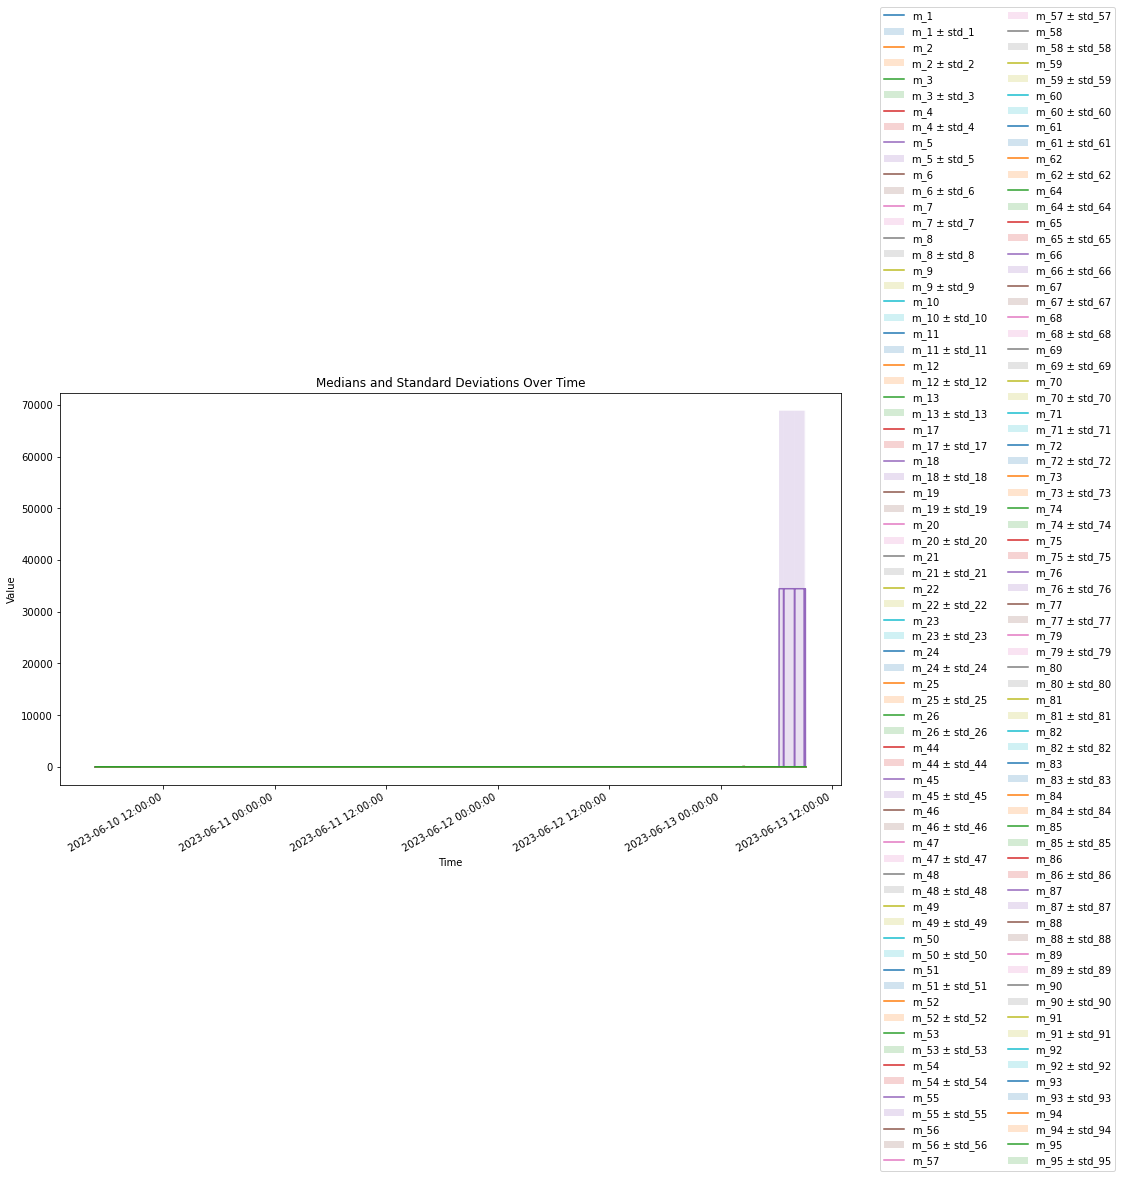

Test X


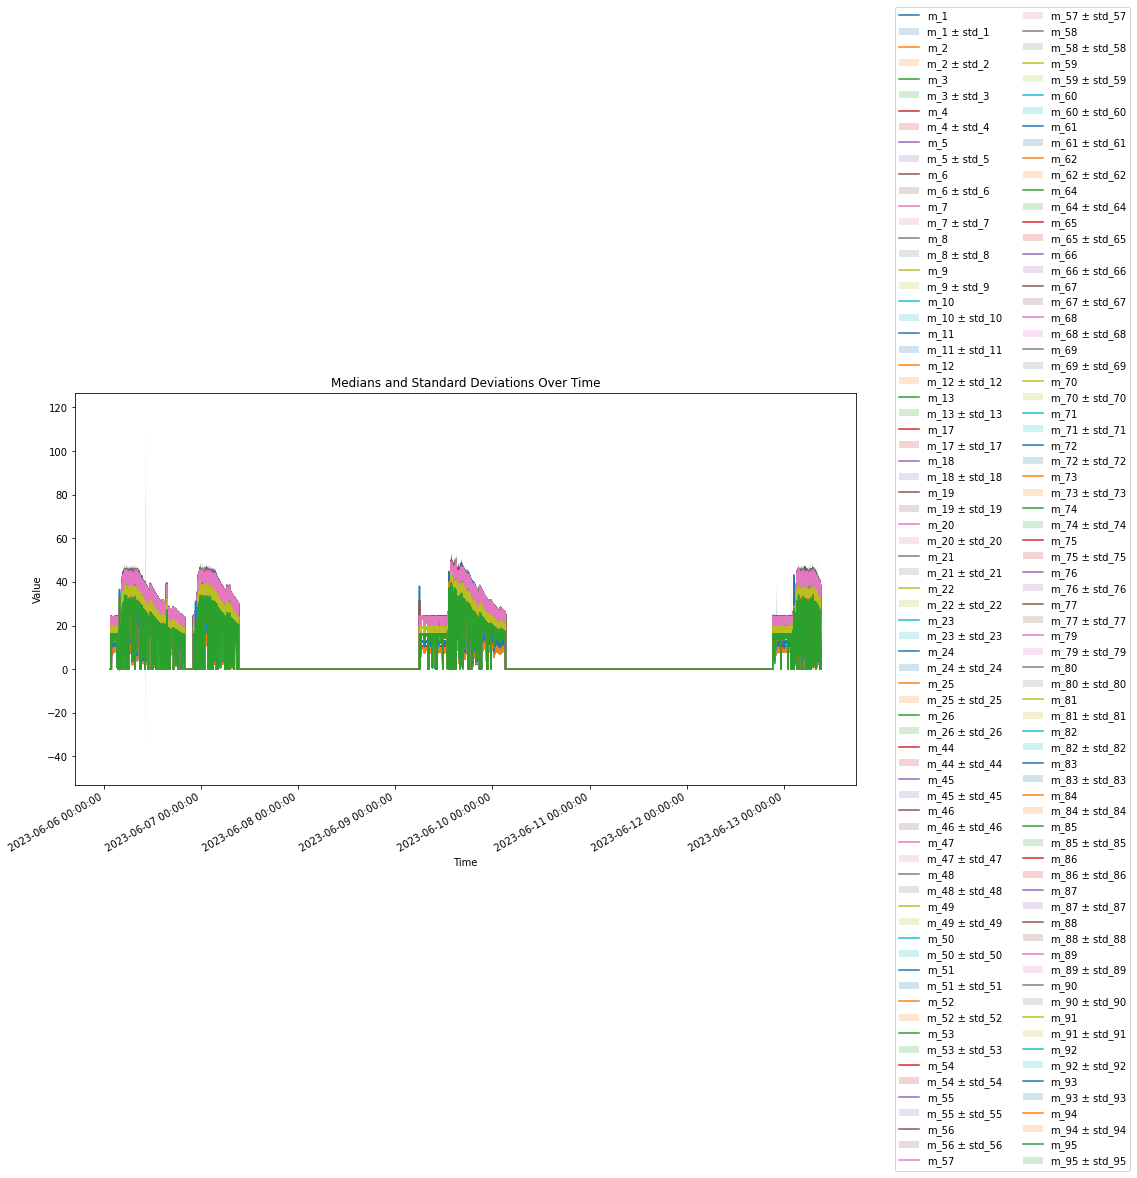

Test y


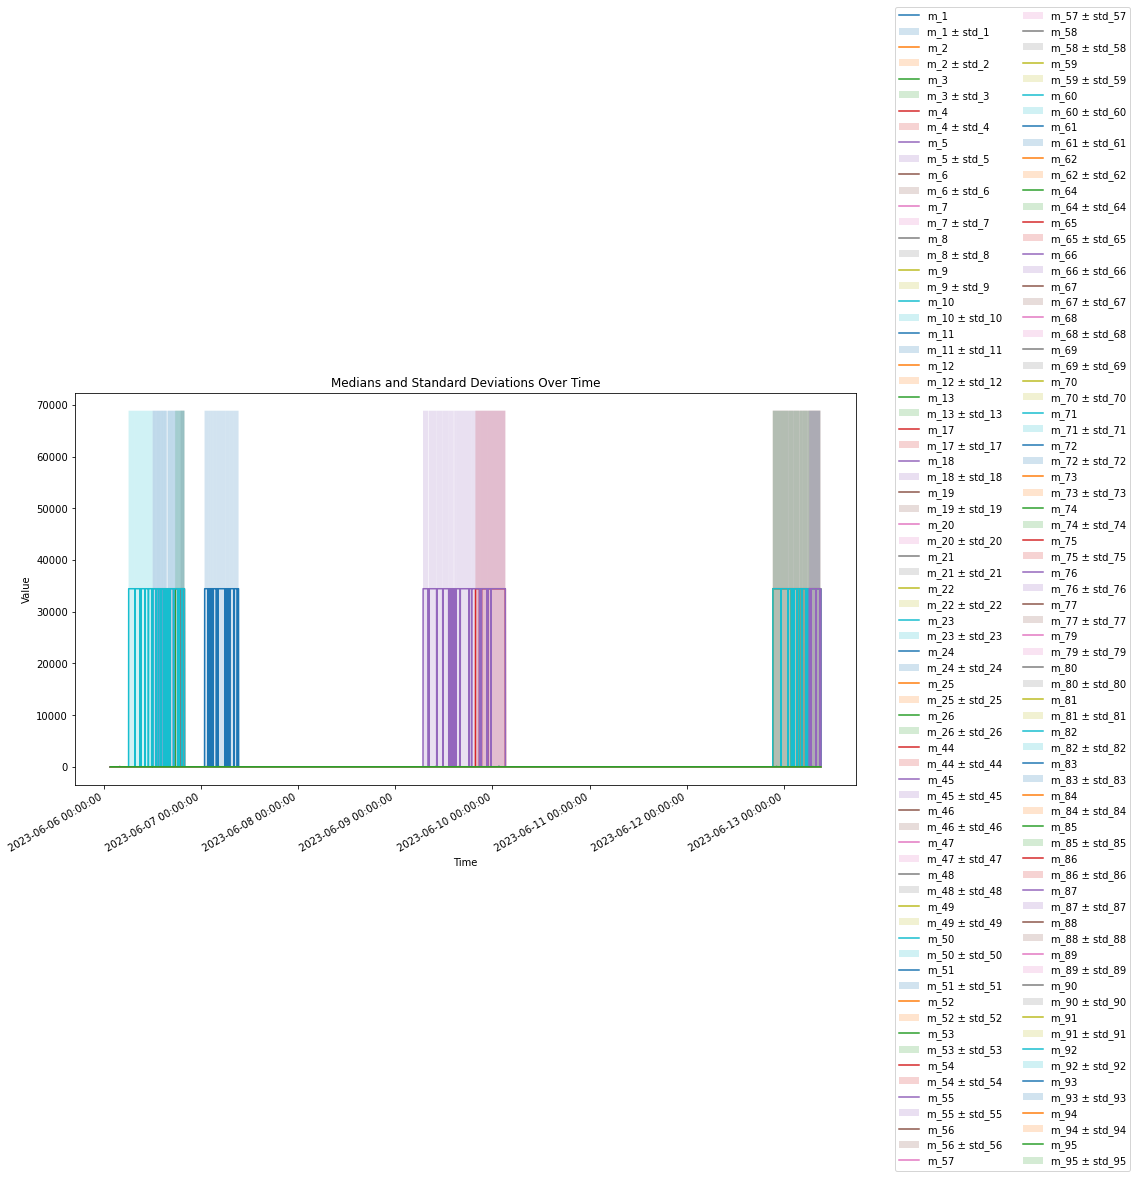

In [10]:
# Load each dataset into a DataFrame

for label, dataset in train_val_test_datasets.items():
    print(label)
    plotting_DL_datasets(dataset)